In [1]:
# Importamos librerías de análisis de datos
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Cargamos el dataframe
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])

In [3]:
# nos quedamos con las columnas que nos interesan
df = df[['tipodepropiedad', 'provincia', 'ciudad', 'metrostotales', 'antiguedad', 'precio', 'fecha']]
df.head()

,tipodepropiedad,provincia,ciudad,metrostotales,antiguedad,precio,fecha
id,,,,,,,
254099,Apartamento,Distrito Federal,Benito Juárez,80.0,NaN,2273000.0,2015-08-23
53461,Casa en condominio,Distrito Federal,La Magdalena Contreras,180.0,10.0,3600000.0,2013-06-28
247984,Casa,Jalisco,Tonalá,166.0,5.0,1200000.0,2015-10-17
209067,Casa,Edo. de México,Zinacantepec,67.0,1.0,650000.0,2012-03-09
185997,Apartamento,Jalisco,Zapopan,95.0,10.0,1150000.0,2016-06-07


In [4]:
df.precio.max()

12525000.0

In [5]:
ordenadoDescendente = df.sort_values(by = ['precio'], ascending = False)
ordenadoDescendente.head(2)

,tipodepropiedad,provincia,ciudad,metrostotales,antiguedad,precio,fecha
id,,,,,,,
153761,Oficina comercial,Distrito Federal,Benito Juárez,208.0,10.0,12525000.0,2015-09-04
181271,Casa,Distrito Federal,Tlalpan,NaN,0.0,12521000.0,2016-10-25


In [6]:
grouped = df.groupby('provincia').agg({'precio':'mean'})
grouped.sort_values(by = ['precio'], ascending = False)

,precio
provincia,
Distrito Federal,3.471705e+06
Edo. de México,2.762465e+06
Nuevo León,2.717758e+06
Guerrero,2.548742e+06
Quintana Roo,2.402967e+06
Jalisco,2.367694e+06
Tabasco,2.300480e+06
Puebla,2.298404e+06
Morelos,2.290088e+06


In [7]:
df.sort_values(by = ['precio'], ascending = True)

,tipodepropiedad,provincia,ciudad,metrostotales,antiguedad,precio,fecha
id,,,,,,,
221380,Casa,Edo. de México,Coacalco de Berriozábal,NaN,1.0,310000.0,2016-12-28
119640,Casa,Puebla,Cuautlancingo,60.0,10.0,310000.0,2016-11-18
92281,Apartamento,Edo. de México,Tultitlán,80.0,20.0,310000.0,2013-10-15
182629,Apartamento,Edo. de México,Ixtapaluca,58.0,10.0,310000.0,2013-04-04
292213,Casa,Edo. de México,Huehuetoca,61.0,0.0,310000.0,2014-10-02
172266,Casa,San luis Potosí,San Luis Potosí,90.0,5.0,310000.0,2016-07-27
173010,Terreno,Colima,Colima,132.0,0.0,310000.0,2012-07-25
271304,Apartamento,Edo. de México,Tlalnepantla de Baz,NaN,10.0,310000.0,2013-02-28
64506,Apartamento,Michoacán,Zamora,44.0,4.0,310000.0,2016-12-30


In [8]:
ordenadoDescendente.head(50)

,tipodepropiedad,provincia,ciudad,metrostotales,antiguedad,precio,fecha
id,,,,,,,
153761,Oficina comercial,Distrito Federal,Benito Juárez,208.0,10.0,12525000.0,2015-09-04
181271,Casa,Distrito Federal,Tlalpan,NaN,0.0,12521000.0,2016-10-25
64975,Apartamento,Distrito Federal,Cuauhtémoc,120.0,5.0,12520000.0,2016-05-16
279973,Apartamento,Distrito Federal,Benito Juárez,313.0,0.0,12516000.0,2016-11-04
165404,Casa,Distrito Federal,Alvaro Obregón,NaN,5.0,12515000.0,2014-07-29
193788,Apartamento,Distrito Federal,Miguel Hidalgo,NaN,0.0,12500000.0,2013-10-10
56501,Casa en condominio,Edo. de México,Metepec,380.0,0.0,12500000.0,2015-11-17
94019,Casa,Distrito Federal,Coyoacán,250.0,NaN,12500000.0,2016-12-25
246504,Casa,Edo. de México,Huixquilucan,255.0,NaN,12500000.0,2016-12-16


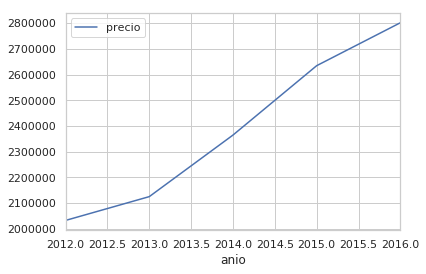

In [10]:
df['anio'] = df['fecha'].dt.year
df2=df.groupby(['anio']).agg({'precio':'mean'}).reset_index()
df2['precio'] = df2['precio'].round(2)

fig, ax = plt.subplots()
df2.plot.line(x='anio', y='precio', ax=ax)

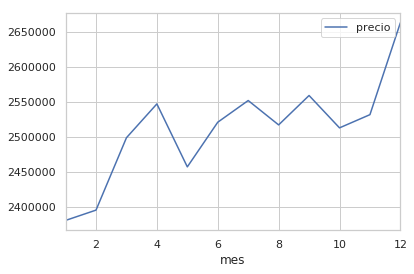

In [11]:
df['mes'] = df['fecha'].dt.month
df2=df.groupby(['mes']).agg({'precio':'mean'}).reset_index()
df2['precio'] = df2['precio'].round(2)

fig, ax = plt.subplots()
df2.plot.line(x='mes', y='precio', ax=ax)